# Learning Curve

### Constant Model

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constant Model
def constantModel(X):
    return np.mean(np.sin(np.dot(np.pi, X)))

def meanModel():
    return 0

def costFunction(n_samples, y_pred, y):                     # Mean Sqaure Error (MSE)
    return (1 / (2 * n_samples)) * np.sum((y_pred - y)**2)

In [139]:
# Define the function
def problem(X):
    return np.sin(np.dot(np.pi, X))

(100,)


(-2.0, 2.0)

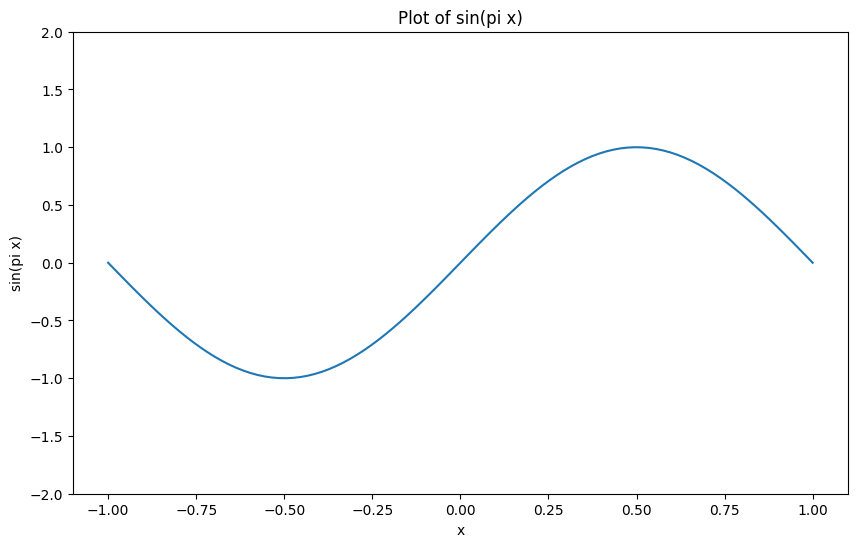

In [140]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

In [141]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# every value from dataset that possible
E_in = [[] for _ in range(len(sample_size_sets))]
E_d = [[] for _ in range(len(sample_size_sets))]
E_out_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)
        
        # for calculate E_out
        y_pred_validation = constantModel(X=rands_X)
        E_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = constantModel(X=rands_X)
        E_in[i].append(costFunction(sample_size_sets[i], y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel()
    print("Sample Size: ", sample_size_sets[i])
    
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    
    z = np.square(np.array(E_d[i]) - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


E_in_all = []
for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print(np.array(E_in_all))
print(np.array(sample_size_sets).shape)


Sample Size:  2
Bias: 0.49499999999999994
Variance: 0.23559184694175303
E_out: 0.7305918469417529

Sample Size:  10
Bias: 0.49499999999999994
Variance: 0.04566880085889926
E_out: 0.5406688008588992

Sample Size:  20
Bias: 0.49499999999999994
Variance: 0.02618921565976779
E_out: 0.5211892156597677

Sample Size:  30
Bias: 0.49499999999999994
Variance: 0.01594671049921928
E_out: 0.5109467104992192

Sample Size:  40
Bias: 0.49499999999999994
Variance: 0.01158073795781357
E_out: 0.5065807379578136

Sample Size:  50
Bias: 0.49499999999999994
Variance: 0.010017568249314188
E_out: 0.5050175682493141

Sample Size:  60
Bias: 0.49499999999999994
Variance: 0.007732337144656262
E_out: 0.5027323371446561

Sample Size:  70
Bias: 0.49499999999999994
Variance: 0.007155724918462064
E_out: 0.502155724918462

Sample Size:  80
Bias: 0.49499999999999994
Variance: 0.006393414310060804
E_out: 0.5013934143100608

Sample Size:  90
Bias: 0.49499999999999994
Variance: 0.005527617267031167
E_out: 0.500527617267031

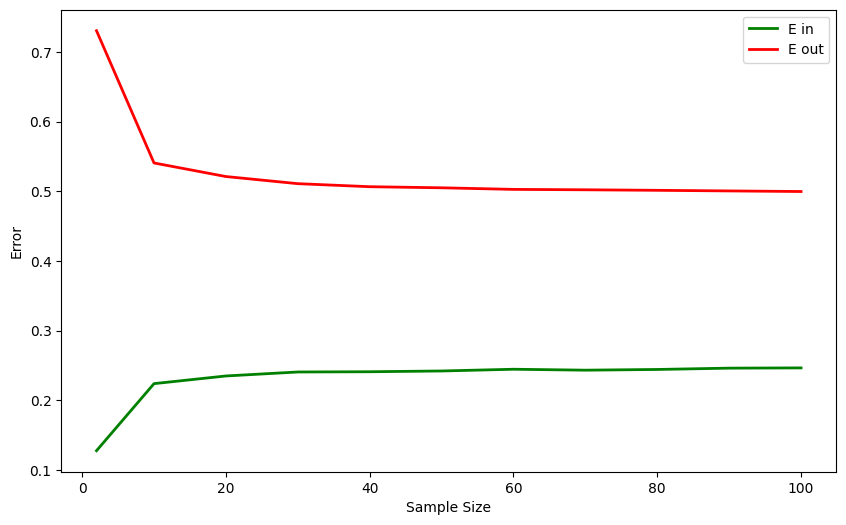

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.legend()
plt.show()